In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Keras provides utility functions to fetch and load common datasets. We will be using Fashion-MNIST dataset.
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 
# Dataset contains a training set and testing set.
# The training set is divided into training and validation.
# The test data will be used later to evaluate the accuracy of the model

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# Divide the dataset into training data and validation data
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
# These are the different classes that we are going to assign to the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
y_train[0]

4

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

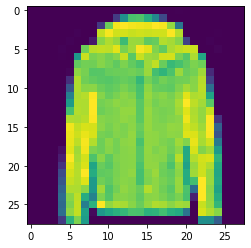

In [ ]:
data=np.array(X_train[0])
plt.imshow(data, interpolation='nearest')
plt.show()

In [ ]:
# Designing the Neural Network
model=keras.models.Sequential([
                               keras.layers.Flatten(input_shape=[28, 28]),
                               keras.layers.Dense(300,activation="relu"),
                               keras.layers.Dense(100,activation="relu"),
                               keras.layers.Dense(10,activation="softmax")
                              ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5386 - accuracy: 0.8035 - val_loss: 0.3849 - val_accuracy: 0.8622
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3914 - accuracy: 0.8553 - val_loss: 0.3938 - val_accuracy: 0.8584
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3501 - accuracy: 0.8699 - val_loss: 0.3284 - val_accuracy: 0.8826
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3238 - accuracy: 0.8787 - val_loss: 0.3339 - val_accuracy: 0.8756
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3055 - accuracy: 0.8856 - val_loss: 0.3355 - val_accuracy: 0.8756
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2902 - accuracy: 0.8899 - val_loss: 0.3167 - val_accuracy: 0.8898
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2758 - accuracy: 0.8963 - val_loss: 0.3519 - val_accuracy:

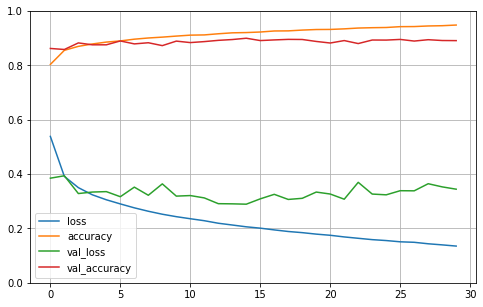

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set the vertical range to [0, 1]
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, y_test, verbose=2, batch_size= 1)
print('test accuracy:', acc)

10000/10000 - 13s - loss: 63.4302 - accuracy: 0.8582
test accuracy: 0.8582000136375427


In [ ]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
classes_x = np.argmax(y_pred,axis=1)

In [ ]:
classes_x

array([9, 2, 1, 1, 6])

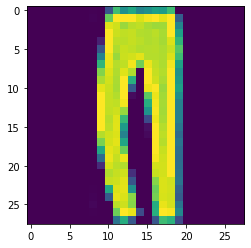

In [ ]:
# Recall: class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
data=np.array(X_new[2])
plt.imshow(data, interpolation='nearest')
plt.show()